In [108]:


#Medical research university X is undergoing a deep research on patients with certain conditions. 
#University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by 
#the client by providing different datasets to the AI team for developing a AIML model which can predict the 
#condition of the patient depending on the received test results.

import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
#https://medium.datadriveninvestor.com/finding-outliers-in-dataset-using-python-efc3fce6ce32

In [79]:
df1=pd.read_csv('Part1 - Normal.csv')

In [4]:
df1.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [5]:
df1.shape

(100, 7)

In [6]:
df2=pd.read_csv('Part1 - Type_H.csv')

In [7]:
df2.shape

(60, 7)

In [8]:
df2.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [14]:
df3=pd.read_csv('Part1 - Type_S.csv')
df3.head()


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [15]:
df3.shape

(150, 7)

In [16]:
df=df1.append([df2,df3])

In [17]:
df.head

<bound method NDFrame.head of      P_incidence     P_tilt    L_angle    S_slope    P_radius    S_Degree  \
0      38.505273  16.964297  35.112814  21.540976  127.632875    7.986683   
1      54.920858  18.968430  51.601455  35.952428  125.846646    2.001642   
2      44.362490   8.945435  46.902096  35.417055  129.220682    4.994195   
3      48.318931  17.452121  48.000000  30.866809  128.980308   -0.910941   
4      45.701789  10.659859  42.577846  35.041929  130.178314   -3.388910   
..           ...        ...        ...        ...         ...         ...   
145    80.111572  33.942432  85.101608  46.169139  125.593624  100.292107   
146    95.480229  46.550053  59.000000  48.930176   96.683903   77.283072   
147    74.094731  18.823727  76.032156  55.271004  128.405731   73.388216   
148    87.679087  20.365613  93.822416  67.313473  120.944829   76.730629   
149    48.259920  16.417462  36.329137  31.842457   94.882336   28.343799   

      Class  
0    Normal  
1    Normal  
2  

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [19]:
#Object class we need to change it
df.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [20]:
#Check if any null values
df.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [21]:
#Check how many types of class are there and if any other datatype is there
df['Class'].value_counts()

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

In [24]:
# Tp_h, Tp-s , nrmal can be merged with Type_H Type_S Normal
df.loc[df['Class']=='tp_s','Class']='Type_S'
df.loc[df['Class']=='Nrmal','Class']='Normal'
df.loc[df['Class']=='type_h','Class']='Type_H'

In [119]:
df['Class'].value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

In [26]:
df['Class']=df['Class'].astype('category') 
#changing to category datatype https://www.geeksforgeeks.org/change-the-data-type-of-a-column-or-a-pandas-series/#:~:text=astype()%20method.,change%20type%20of%20selected%20columns.

In [27]:
df['Class'].nunique()

3

In [28]:
# Visualisation of data
df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


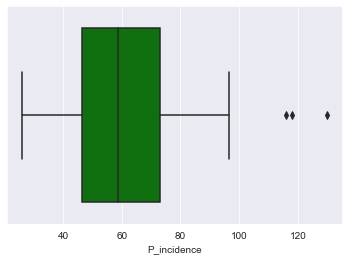

In [40]:
# univariate analysis of variables p_incidence

sns.boxplot(x = 'P_incidence', data=df,  orient='h' , color='Green')
# no of outliers = 3

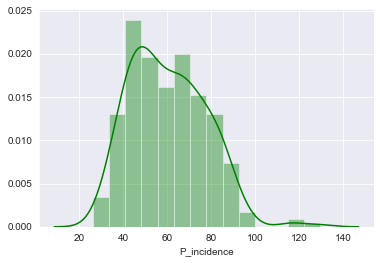

In [41]:
# 
sns.distplot(df['P_incidence'], color='Green')

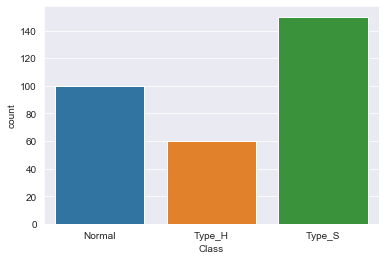

[]


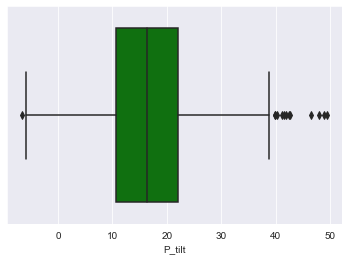

In [54]:
# univariate analysis of variables p_tilt

sns.boxplot(x = 'P_tilt', data=df,  orient='h' , color='Green')
# higher outliers 
outliers=[]
def detect_outlier(df):
    
   # threshold=3
    mean_1 = np.mean(df)
    std_1 =np.std(df)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
print (outliers)

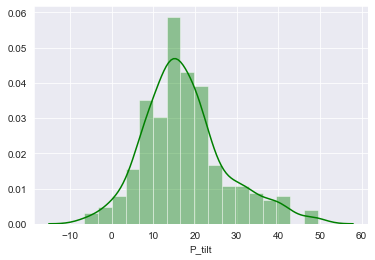

In [43]:
# 
sns.distplot(df['P_tilt'], color='Green')

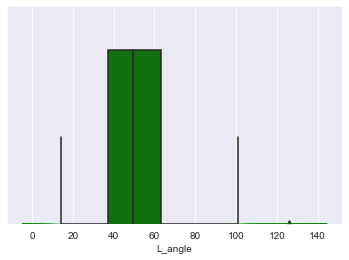

In [60]:
# univariate analysis of variables l_angle
sns.boxplot(x = 'L_angle', data=df,  orient='h', color='Green')


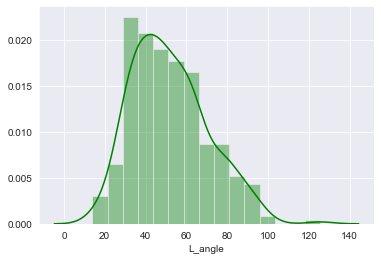

In [61]:
sns.distplot(df['L_angle'], color='Green')

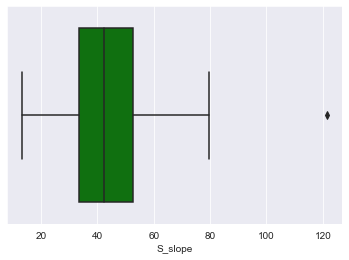

In [63]:
#S_slope
sns.boxplot(x = 'S_slope', data=df,  orient='h', color='Green')

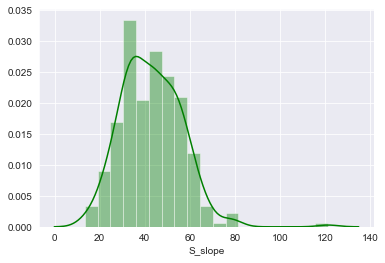

In [64]:
sns.distplot(df['S_slope'], color='Green')

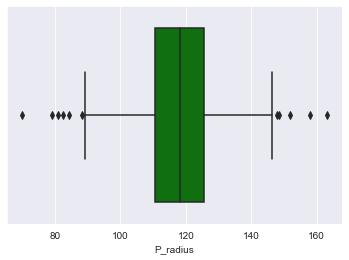

In [71]:
#P_radius
sns.boxplot(x = 'P_radius', data=df,  orient='h' ,color='Green')


In [85]:
outlier_datapoints = detect_outlier(df.P_radius)
print(outlier_datapoints)

[163.0710405, 70.08257486, 157.84879899999999, 163.0710405, 70.08257486, 157.84879899999999]


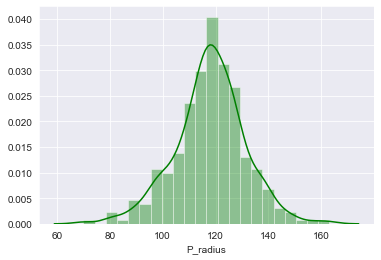

In [86]:
#P_radius distpot
sns.distplot(df['P_radius'],color='Green')

[163.0710405, 70.08257486, 157.84879899999999, 163.0710405, 70.08257486, 157.84879899999999, 145.37814319999998, 148.75371090000002, 418.54308210000005, 145.37814319999998, 148.75371090000002, 418.54308210000005]


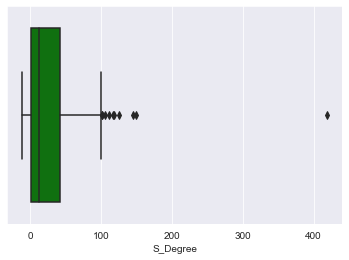

In [89]:
#S_Degree
sns.boxplot(x = 'S_Degree', data=df,  orient='h' ,color='Green')
outlier_datapoints = detect_outlier(df.S_Degree)

print(outlier_datapoints)


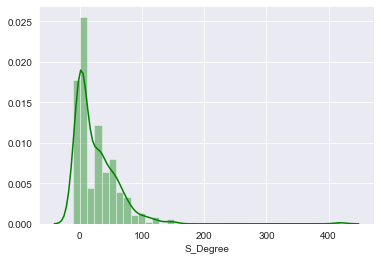

In [90]:
sns.distplot(df['S_Degree'], color='Green')

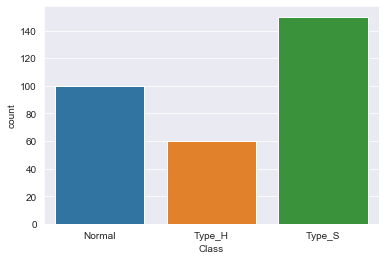

In [91]:
# Checking the distribution of target variables

sns.countplot('Class',data=df)

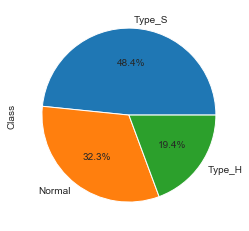

In [93]:
df['Class'].value_counts().plot.pie(autopct='%1.1f%%')

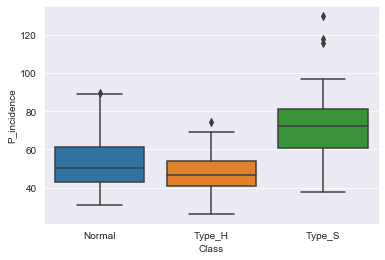

In [94]:
# BIVARIATE analysis
# Target vs dependent variables
sns.boxplot(x='Class', y='P_incidence', data= df)

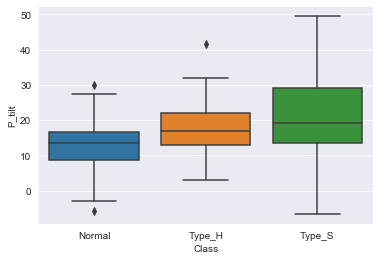

In [95]:
sns.boxplot(x='Class', y='P_tilt', data= df)

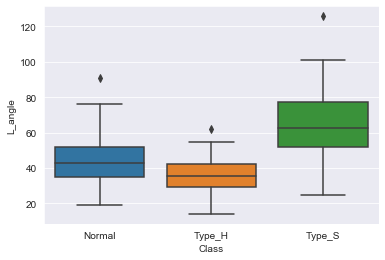

In [96]:
sns.boxplot(x='Class', y='L_angle', data= df)

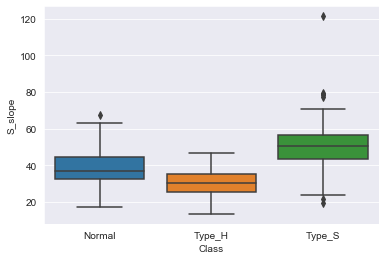

In [98]:
sns.boxplot(x='Class', y='S_slope', data= df)

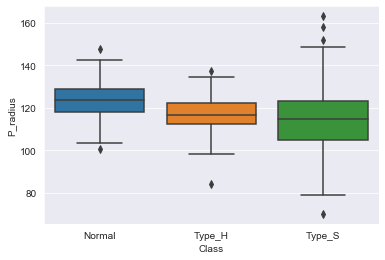

In [99]:
sns.boxplot(x='Class', y='P_radius', data= df)

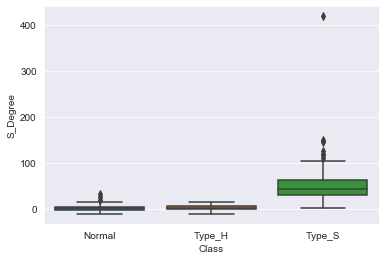

In [100]:
sns.boxplot(x='Class', y='S_Degree', data= df)

In [ ]:
###############################
#Multivariate Analysis
###############################

In [101]:
df.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

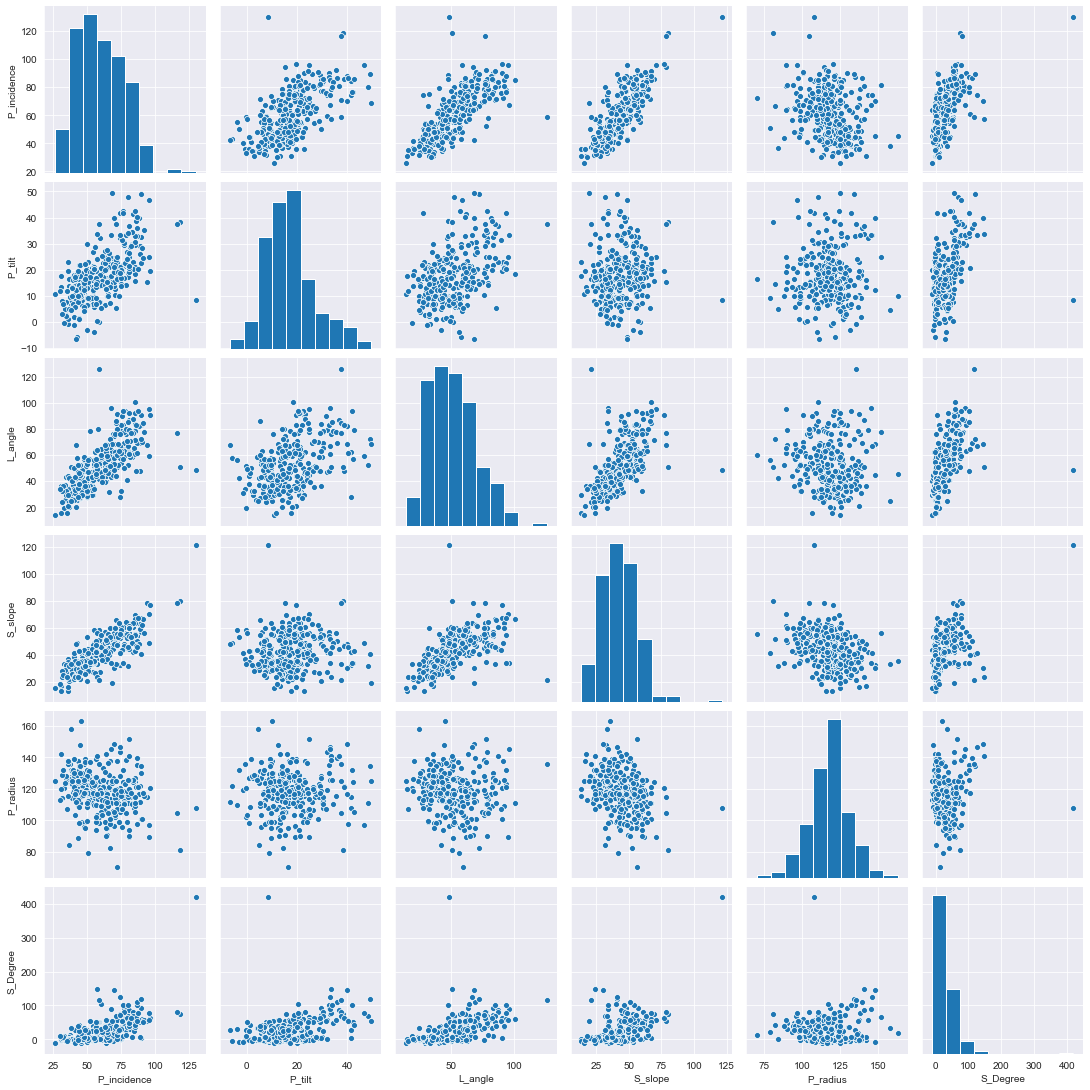

In [109]:
sns.pairplot(df)
plt.show()

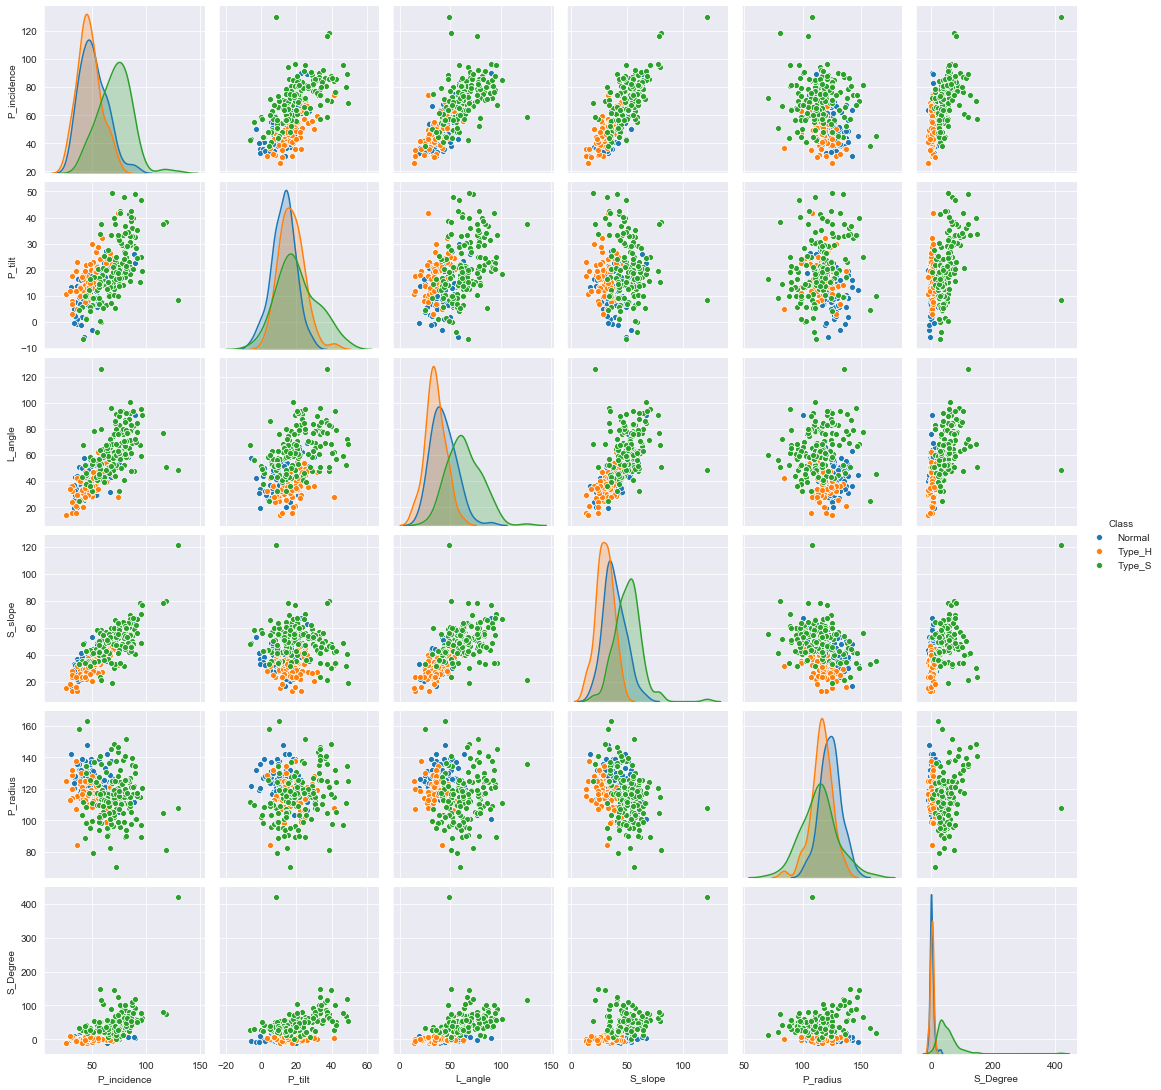

In [110]:
sns.pairplot(df,hue='Class')

In [111]:
###################################################
# Normal class has higher radius
# Normal class jas higher values
# Type_S is more occurences as other two classes
# Lets check the mean of the classes against the independent variables
###################################################

In [112]:
class_summary=df.groupby('Class')

In [114]:
class_summary.mean().reset_index()

,Class,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,Normal,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572
1,Type_H,47.638407,17.398795,35.463524,30.239612,116.474968,2.480251
2,Type_S,71.514224,20.748038,64.110108,50.766186,114.518810,51.896687


In [ ]:
####################################
#Data pre-processing:
#• Segregate predictors vs target attributes
#• Perform normalisation or scaling if required.
#• Check for target balancing. Add your comments.
#• Perform train-test split
###################################

In [123]:
df['Class'].value_counts()

le=LabelEncoder()
#fit_transform(y) Fit label encoder and return encoded labels.

df['Class']=le.fit_transform(df['Class'])

df['Class'].value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

In [124]:
df['Class']=df['Class'].astype('category') #changing datatype to category.

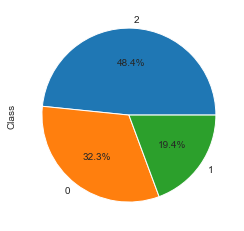

In [125]:
df['Class'].value_counts().plot.pie(autopct='%1.1f%%')

NameError: name 'X' is not defined

In [127]:
# Arrange data into independent variables and dependent variables
X=df.drop(columns='Class')

y=df['Class'] #target

In [128]:
#Perform normalisation or scaling if required.

X_Scaled=X.apply(zscore)


In [129]:
X_Scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,8.702716e-17,1.001617,-1.996010,-0.817398,-0.104925,0.719464,4.029206
P_tilt,310.0,2.326096e-16,1.001617,-2.411664,-0.688114,-0.118606,0.458116,3.191402
L_angle,310.0,1.980495e-16,1.001617,-2.047652,-0.806027,-0.127862,0.597549,3.984615
S_slope,310.0,5.121351e-17,1.001617,-2.207741,-0.716842,-0.040960,0.726941,5.855771
P_radius,310.0,-6.274551e-16,1.001617,-3.597963,-0.542383,0.026138,0.567621,3.395818
S_Degree,310.0,-8.156558e-17,1.001617,-0.996172,-0.658507,-0.387450,0.399768,10.460350


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [ ]:
#Model training, testing and tuning:
#• Design and train a KNN classifier.
#• Display the classification accuracies for train and test data.
#• Display and explain the classification report in detail.
#• Automate the task of finding best values of K for KNN.
#• Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained 
# model with your comments for selecting this model. 

In [133]:
#Design and train a KNN classifier.
KNN = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean' ) #Building knn with 5 neighbors
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)

In [136]:
#Display the classification accuracies for train and test data.
print('Accuracy on Training data:',KNN.score(X_train, y_train) )

print('Accuracy on Test data:',KNN.score(X_test, y_test) )

Accuracy on Training data: 0.8940092165898618
Accuracy on Test data: 0.7741935483870968


In [137]:
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.70      0.57      0.63        28
           1       0.46      0.67      0.55        18
           2       1.00      0.94      0.97        47

    accuracy                           0.77        93
   macro avg       0.72      0.72      0.71        93
weighted avg       0.80      0.77      0.78        93



In [ ]:
# max F1 score for class 2
# Max prediction for class 2 

In [138]:
#Automate the task of finding best values of K for KNN
train_score=[]
test_score=[]
for k in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean' ) 
    KNN.fit(X_train, y_train)
    train_score.append(KNN.score(X_train, y_train))
    test_score.append(KNN.score(X_test, y_test))

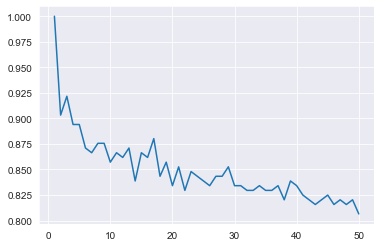

In [139]:
plt.plot(range(1,51),train_score)
plt.show()

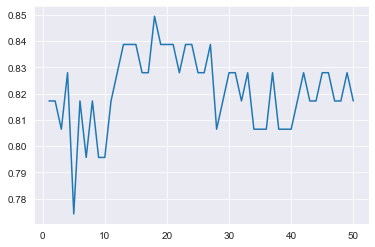

In [140]:
plt.plot(range(1,51),test_score)
plt.show()

In [141]:
k=[1,3,5,7,9,11,13,15,17,19]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' ) 
    KNN.fit(X_train, y_train)
    predicted_labels = KNN.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(X_train, y_train)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.8172043010752689:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.75      0.64      0.69        28
           1       0.58      0.78      0.67        18
           2       0.98      0.94      0.96        47

    accuracy                           0.82        93
   macro avg       0.77      0.79      0.77        93
weighted avg       0.83      0.82      0.82        93

Accuracy on Training data for k 3 is 0.9216589861751152:
Accuracy on Test data for k 3 is 0.8064516129032258:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.76      0.57      0.65        28
           1       0.54      0.78      0.64        18
           2       0.98      0.96      0.97        47

    accuracy                           0.81        93
   macro avg       0.76      0.77      0.75        93
weighted avg       0.83      0.81     

In [ ]:
#Conclusion
#For Knn, k=13 we are getting balanced train and test error
#We can use KNN as a final model because of balanced train and test error also the recall and precision values are good